# TASK # 1

# Baye's Without Libraries

With out Libraries : 

			 **** Custom Naïve Bayes : ******

Accuracy: 0.88
Precision: 1.00
Recall: 0.75


				 Confusion Matrix : 
[[4, 0], [1, 3]]


Text(120.72222222222221, 0.5, 'Actual')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


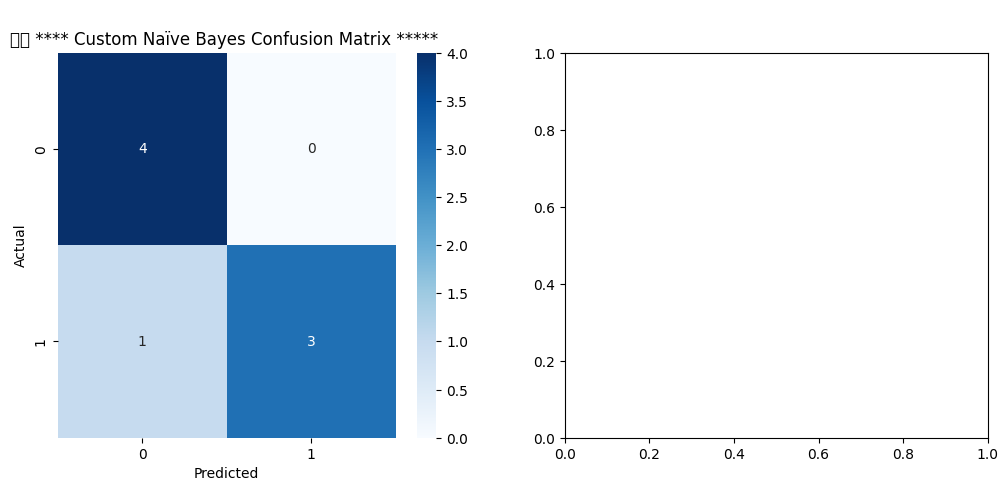

In [ ]:
data_path = '/content/sample_data/badminton_dataset.csv'

data = []
with open(data_path, 'r') as file:
    for line in file:
        data.append(line.strip().split(','))

headers = data[0]
data = data[1:]
 
unique_values = {}
for col in range(len(headers)):
    col_values = [row[col] for row in data]
    if not col_values[0].isdigit():
        unique_values[headers[col]] = list(set(col_values))
        for row in data:
            row[col] = unique_values[headers[col]].index(row[col])

X = [list(map(float, row[:-1])) for row in data]
y = [int(row[-1]) for row in data]

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Naive Bayes implementation manually
classes = list(set(y_train))
class_priors = {c: y_train.count(c) / len(y_train) for c in classes}
means = {c: [sum([X_train[i][j] for i in range(len(X_train)) if y_train[i] == c]) / y_train.count(c) for j in range(len(X_train[0]))] for c in classes}
variances = {c: [max(sum([(X_train[i][j] - means[c][j]) ** 2 for i in range(len(X_train)) if y_train[i] == c]) / y_train.count(c), 1e-6) for j in range(len(X_train[0]))] for c in classes}

def predict_naive_bayes(X):
    predictions = []
    for x in X:
        probabilities = {}
        for c in classes:
            likelihood = 1
            for j in range(len(x)):
                likelihood *= (1 / ((2 * 3.1415 * variances[c][j]) ** 0.5)) * (2.71828 ** (-((x[j] - means[c][j]) ** 2) / (2 * variances[c][j])))
            probabilities[c] = class_priors[c] * likelihood
        predictions.append(max(probabilities, key=probabilities.get))
    return predictions

y_pred_custom = predict_naive_bayes(X_test)

# Confusion matrix and accuracy manually

TP = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_custom[i] == 1])
TN = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_custom[i] == 0])
FP = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_custom[i] == 1])
FN = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_custom[i] == 0])

total = TP + TN + FP + FN
accuracy_custom = (TP + TN) / total if total != 0 else 0
precision_custom = TP / (TP + FP) if (TP + FP) != 0 else 0
recall_custom = TP / (TP + FN) if (TP + FN) != 0 else 0

cm_custom = [[TN, FP], [FN, TP]]


print("With out Libraries : ")
print("\n\t\t\t **** Custom Naïve Bayes : ******\n")
print(f"Accuracy: {accuracy_custom:.2f}")
print(f"Precision: {precision_custom:.2f}")
print(f"Recall: {recall_custom:.2f}\n")
print("\n\t\t\t\t Confusion Matrix : ")
print(cm_custom)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_custom, annot=True, fmt="d", cmap="Blues", ax=axes[0])

axes[0].set_title("\n\t\t **** Custom Naïve Bayes Confusion Matrix ***** ")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")



# Baye's with Libraries :


			 **** Custom Naïve Bayes : ( Without Libraries ) ***** 

Accuracy: 0.88
Precision: 1.00
Recall: 0.75


			 **** Sklearn Naïve Bayes : (With Libraries) ****

Accuracy: 0.75
Precision: 0.85
Recall: 0.75

				 Confusion Matrix : 
[[3 2]
 [0 3]] 


			 **** Comparison of both Baye's ***** 



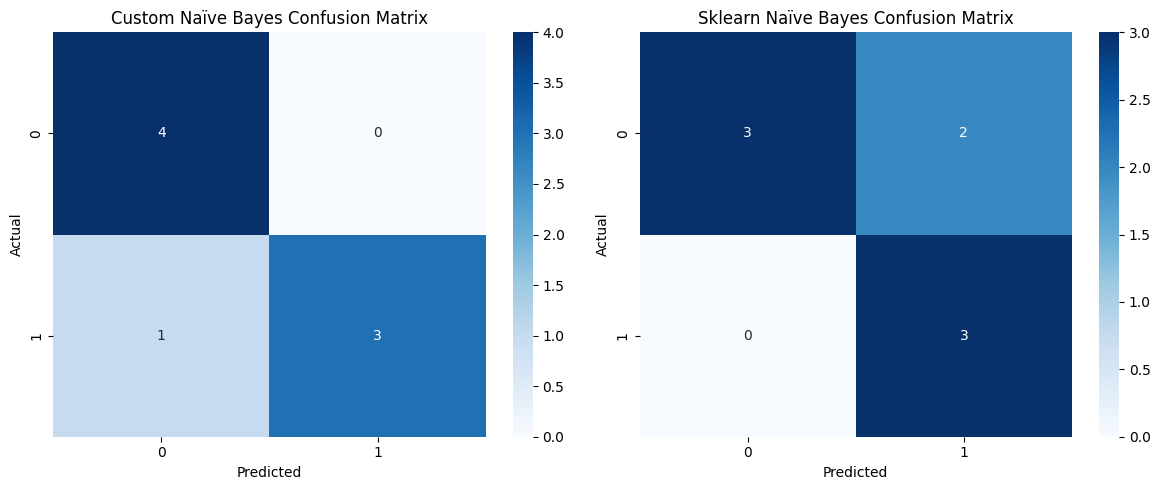

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

data_path = '/content/sample_data/badminton_dataset.csv'
data = pd.read_csv(data_path)

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_sklearn = GaussianNB()
nb_sklearn.fit(X_train, y_train)
y_pred_sklearn = nb_sklearn.predict(X_test)

cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')

print("\n\t\t\t **** Custom Naïve Bayes : ( Without Libraries ) ***** \n")
print(f"Accuracy: {accuracy_custom:.2f}")
print(f"Precision: {precision_custom:.2f}")
print(f"Recall: {recall_custom:.2f}\n")

print("\n\t\t\t **** Sklearn Naïve Bayes : (With Libraries) ****\n")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print(f"Precision: {precision_sklearn:.2f}")
print(f"Recall: {recall_sklearn:.2f}")

cm = confusion_matrix(y_test, y_pred_sklearn)
print("\n\t\t\t\t Confusion Matrix : ")
print(cm,"\n")

print("\n\t\t\t **** Comparison of both Baye's ***** \n")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_custom, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Custom Naïve Bayes Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_sklearn, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Sklearn Naïve Bayes Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# TASK # 2

# RANDOM FOREST CLASSIFIER


			 ***** RANDOM FOREST CLASSIFIER **** 

				  Columns in the dataset:
['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']

			 Random Forest Classifier Results :

 Accuracy: 0.97
 Precision: 0.97
 Recall: 0.97
 F1 Score: 0.96

				 Confusion Matrix : 
[[108   1   7   2]
 [  1  12   0   4]
 [  1   0 360   0]
 [  2   0   0  21]] 



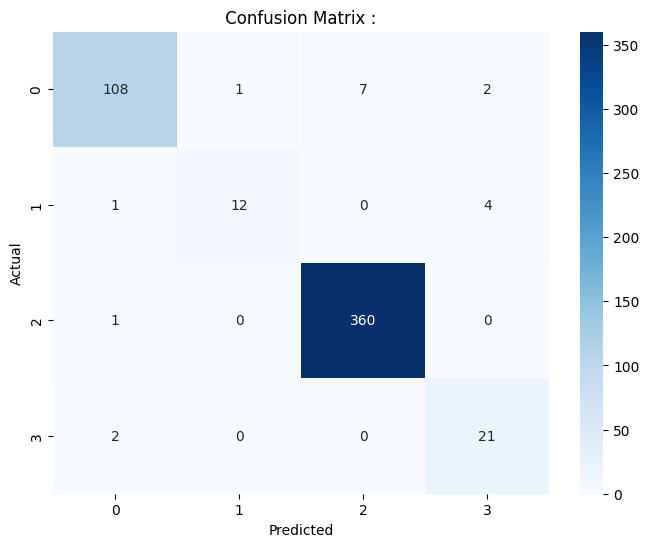

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data_path = 'car_evaluation.csv'
data = pd.read_csv(data_path)

print("\n\t\t\t ***** RANDOM FOREST CLASSIFIER **** ")
print("\n\t\t\t\t  Columns in the dataset:")
print(data.columns.tolist())

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n\t\t\t Random Forest Classifier Results :")
print(f"\n Accuracy: {accuracy:.2f}")
print(f" Precision: {precision:.2f}")
print(f" Recall: {recall:.2f}")
print(f" F1 Score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\n\t\t\t\t Confusion Matrix : ")
print(cm,"\n")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(" Confusion Matrix : ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'